In [1]:
# Source: https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

# Imbalanced weights

In [1]:
import pandas as pd
import sys
sys.path.append('../machine_learning')
import numpy as np
from utils import extract_target_feature
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

target_value = 'has_graffiti'

df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
df['has_graffiti'] = (df['graffiti_count'] > 0).astype(float)
df.drop(columns='graffiti_count', inplace=True)
x, y = extract_target_feature(df, target_value)

regressor = LogisticRegression(max_iter=999)

regressor.fit(x / np.std(x, 0), y)
df_summary = pd.DataFrame(data={'coef': regressor.coef_[0].round(5)}, index=x.columns)
df_summary['abs_coef'] = df_summary['coef'].map(abs)
df_summary = df_summary.sort_values('abs_coef', ascending=False)
df_summary = df_summary.drop('abs_coef', axis=1)
df_summary

coef
four_houses_away_graffiti_buildings               0.82626
one_house_away_graffiti_buildings                 0.77280
one_house_away_buildings_count                   -0.61574
four_houses_away_graffiti_count                  -0.48861
one_house_away_buildings_median_height            0.38123
one_house_away_graffiti_average                   0.34206
one_house_away_graffiti_count                    -0.31271
four_houses_away_buildings_average_height        -0.29376
four_houses_away_graffiti_average                 0.28826
one_house_away_buildings_average_height          -0.28481
two_houses_away_graffiti_average                  0.26985
four_houses_away_buildings_total_sub_buildings   -0.24114
two_houses_away_graffiti_buildings                0.23341
two_houses_away_buildings_median_height           0.23049
two_houses_away_buildings_average_height         -0.22780
two_houses_away_graffiti_count                   -0.20831
two_houses_away_buildings_count                  -0.20740
four_houses_away_buildings_median_height          0.19634
sub_buildings                                     0.19242
four_houses_away_buildings_average_sub_buildings  0.18762
four_houses_away_buildings_count                 -0.17833
roof_type_Flat                                    0.16655
roof_type_Pitched                                -0.14405
four_houses_away_buildings_median_sub_buildings  -0.14299
one_house_away_buildings_average_sub_buildings   -0.13979
two_houses_away_street_lights                     0.12986
geo_local_area_population                         0.12297
highest_elevation_m                              -0.12278
street_type_arterial                              0.10924
two_houses_away_buildings_total_sub_buildings     0.10758
one_house_away_buildings_total_sub_buildings     -0.10214
street_type_residential                          -0.08977
one_house_away_street_lights                      0.08557
one_house_away_buildings_median_sub_buildings     0.07364
geo_local_area_area_m2                           -0.05838
two_houses_away_buildings_average_sub_buildings  -0.05530
four_houses_away_street_lights                    0.04355
street_type_secondary_arterial                    0.04347
two_houses_away_buildings_median_sub_buildings   -0.03994
street_type_collector                            -0.03967
roof_type_Complex                                -0.01765
area_m2                                           0.01598
pop_density                                      -0.00102

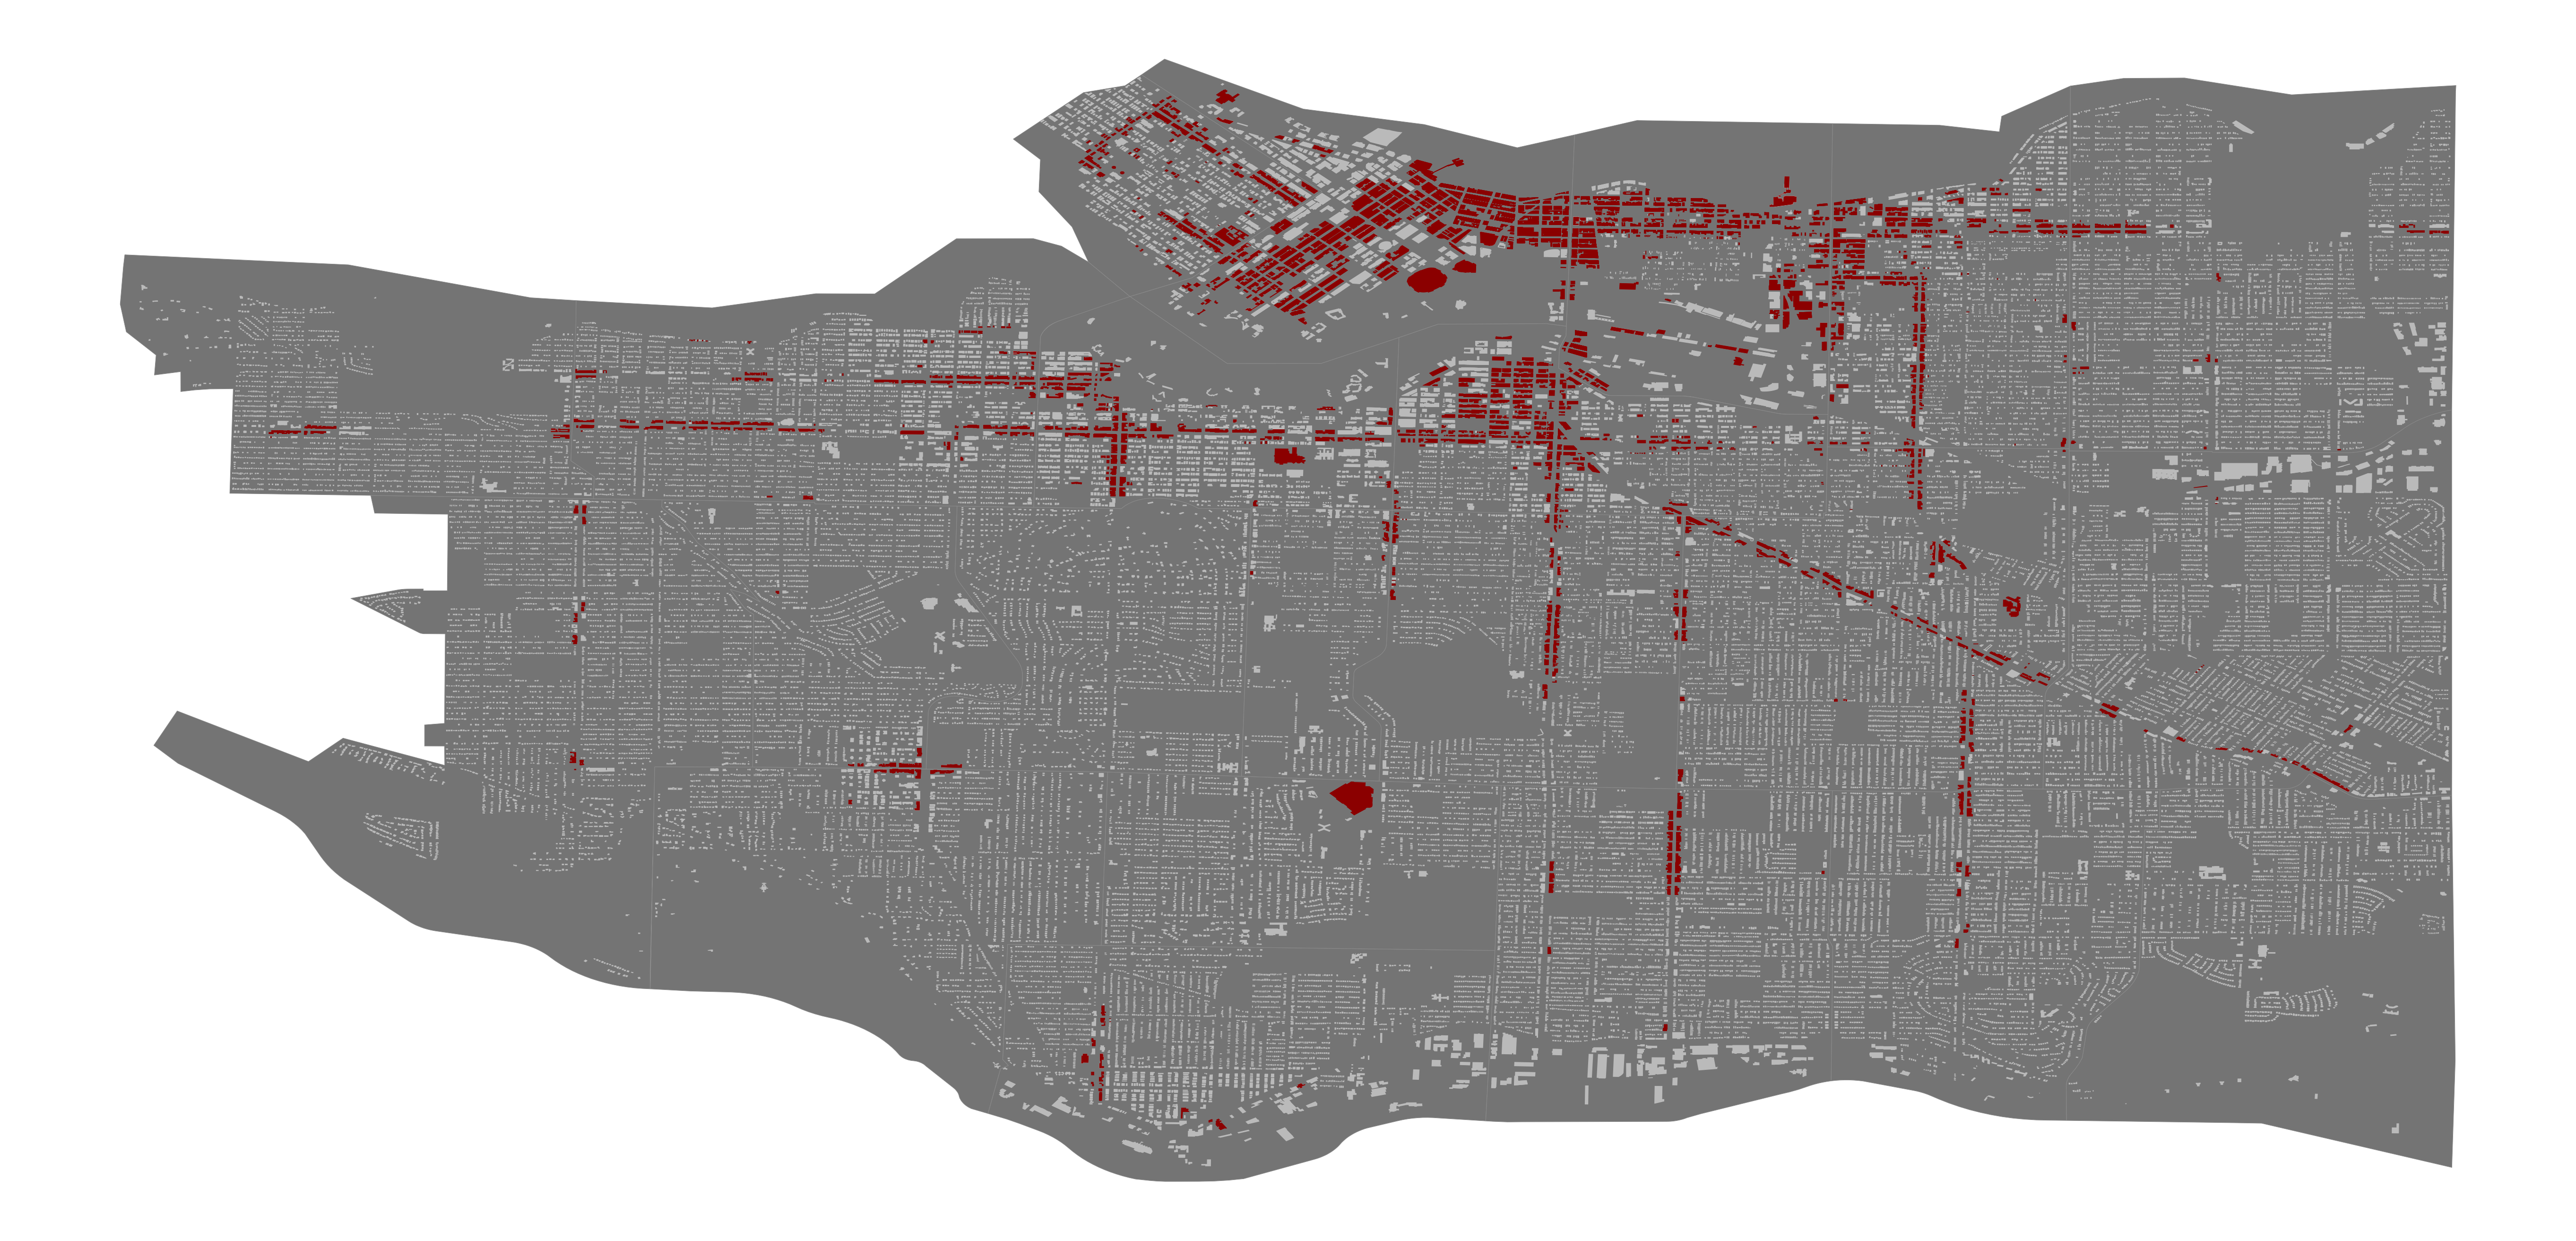

In [3]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import shape
import json
import seaborn as sns

colours = sns.color_palette("gray", 10)

vancouver_colour = colours[4]
edge_colour = colours[5]
buildings_colour = colours[7]

width_inches = 100

vancouver = gpd.read_file('../resources/data/original/local-area-boundary.csv')
vancouver['geometry'] = [shape(json.loads(x)) for x in vancouver['Geom']]
buildings \
    = gpd.read_file('../resources/data/generated/buildings_all_features.csv')
buildings['geometry'] \
    = [shape(json.loads(x)) for x in buildings['building_polygon']]

buildings['graffiti_count'] = regressor.predict(x / np.std(x, 0))

# custom colourmap
norm = matplotlib.colors.Normalize(0, buildings['graffiti_count'].max())
colors = [
    [norm(0), buildings_colour],
    [norm(0.99), buildings_colour],
    [norm(1), (246 / 255, 124 / 255, 82 / 255)],
    [norm(buildings['graffiti_count'].max()), "darkred"]
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots()
vancouver.plot(
    ax=ax,
    edgecolor=edge_colour,
    facecolor=vancouver_colour,
    antialiased=True,
)
ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
buildings = buildings.sort_values('graffiti_count')
buildings.plot(
    ax=ax,
    antialiased=True,
    column='graffiti_count',
    cmap=cmap,
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_difference = xlim[1] - xlim[0]
y_difference = ylim[1] - ylim[0]
fig.set_size_inches(width_inches, width_inches / x_difference * y_difference)

plt.show()

# Balanced Weights

In [4]:
target_value = 'has_graffiti'

df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
df['has_graffiti'] = (df['graffiti_count'] > 0).astype(float)
df.drop(columns='graffiti_count', inplace=True)
x, y = extract_target_feature(df, target_value)

regressor = LogisticRegression(max_iter=999, class_weight='balanced')

regressor.fit(x / np.std(x, 0), y)
df_summary = pd.DataFrame(data={'coef': regressor.coef_[0].round(5)}, index=x.columns)
df_summary['abs_coef'] = df_summary['coef'].map(abs)
df_summary = df_summary.sort_values('abs_coef', ascending=False)
df_summary = df_summary.drop('abs_coef', axis=1)
df_summary

coef
four_houses_away_graffiti_buildings               1.20029
four_houses_away_graffiti_count                  -0.88994
one_house_away_buildings_average_sub_buildings   -0.79784
one_house_away_graffiti_buildings                 0.72744
one_house_away_buildings_median_sub_buildings     0.70437
one_house_away_buildings_count                   -0.51494
four_houses_away_graffiti_average                 0.47396
four_houses_away_buildings_average_height        -0.43637
two_houses_away_graffiti_buildings                0.41469
one_house_away_graffiti_average                   0.36153
one_house_away_graffiti_count                    -0.32885
four_houses_away_buildings_median_height          0.32556
sub_buildings                                     0.27927
one_house_away_buildings_median_height            0.26968
two_houses_away_graffiti_average                  0.26506
two_houses_away_buildings_average_height         -0.25611
four_houses_away_buildings_total_sub_buildings   -0.25532
two_houses_away_graffiti_count                   -0.23672
four_houses_away_buildings_count                 -0.22703
geo_local_area_population                         0.21764
two_houses_away_street_lights                     0.20665
two_houses_away_buildings_median_height           0.19464
one_house_away_buildings_average_height          -0.17472
street_type_residential                          -0.16221
two_houses_away_buildings_count                  -0.14416
roof_type_Pitched                                -0.13612
geo_local_area_area_m2                           -0.13075
four_houses_away_street_lights                    0.11268
four_houses_away_buildings_median_sub_buildings  -0.10502
four_houses_away_buildings_average_sub_buildings  0.10169
two_houses_away_buildings_average_sub_buildings  -0.10159
area_m2                                           0.08497
one_house_away_street_lights                      0.08365
street_type_collector                            -0.05830
highest_elevation_m                              -0.05632
one_house_away_buildings_total_sub_buildings     -0.05479
street_type_arterial                              0.04410
two_houses_away_buildings_total_sub_buildings    -0.04296
roof_type_Complex                                -0.03344
roof_type_Flat                                    0.01503
street_type_secondary_arterial                   -0.01484
pop_density                                      -0.01256
two_houses_away_buildings_median_sub_buildings    0.00350

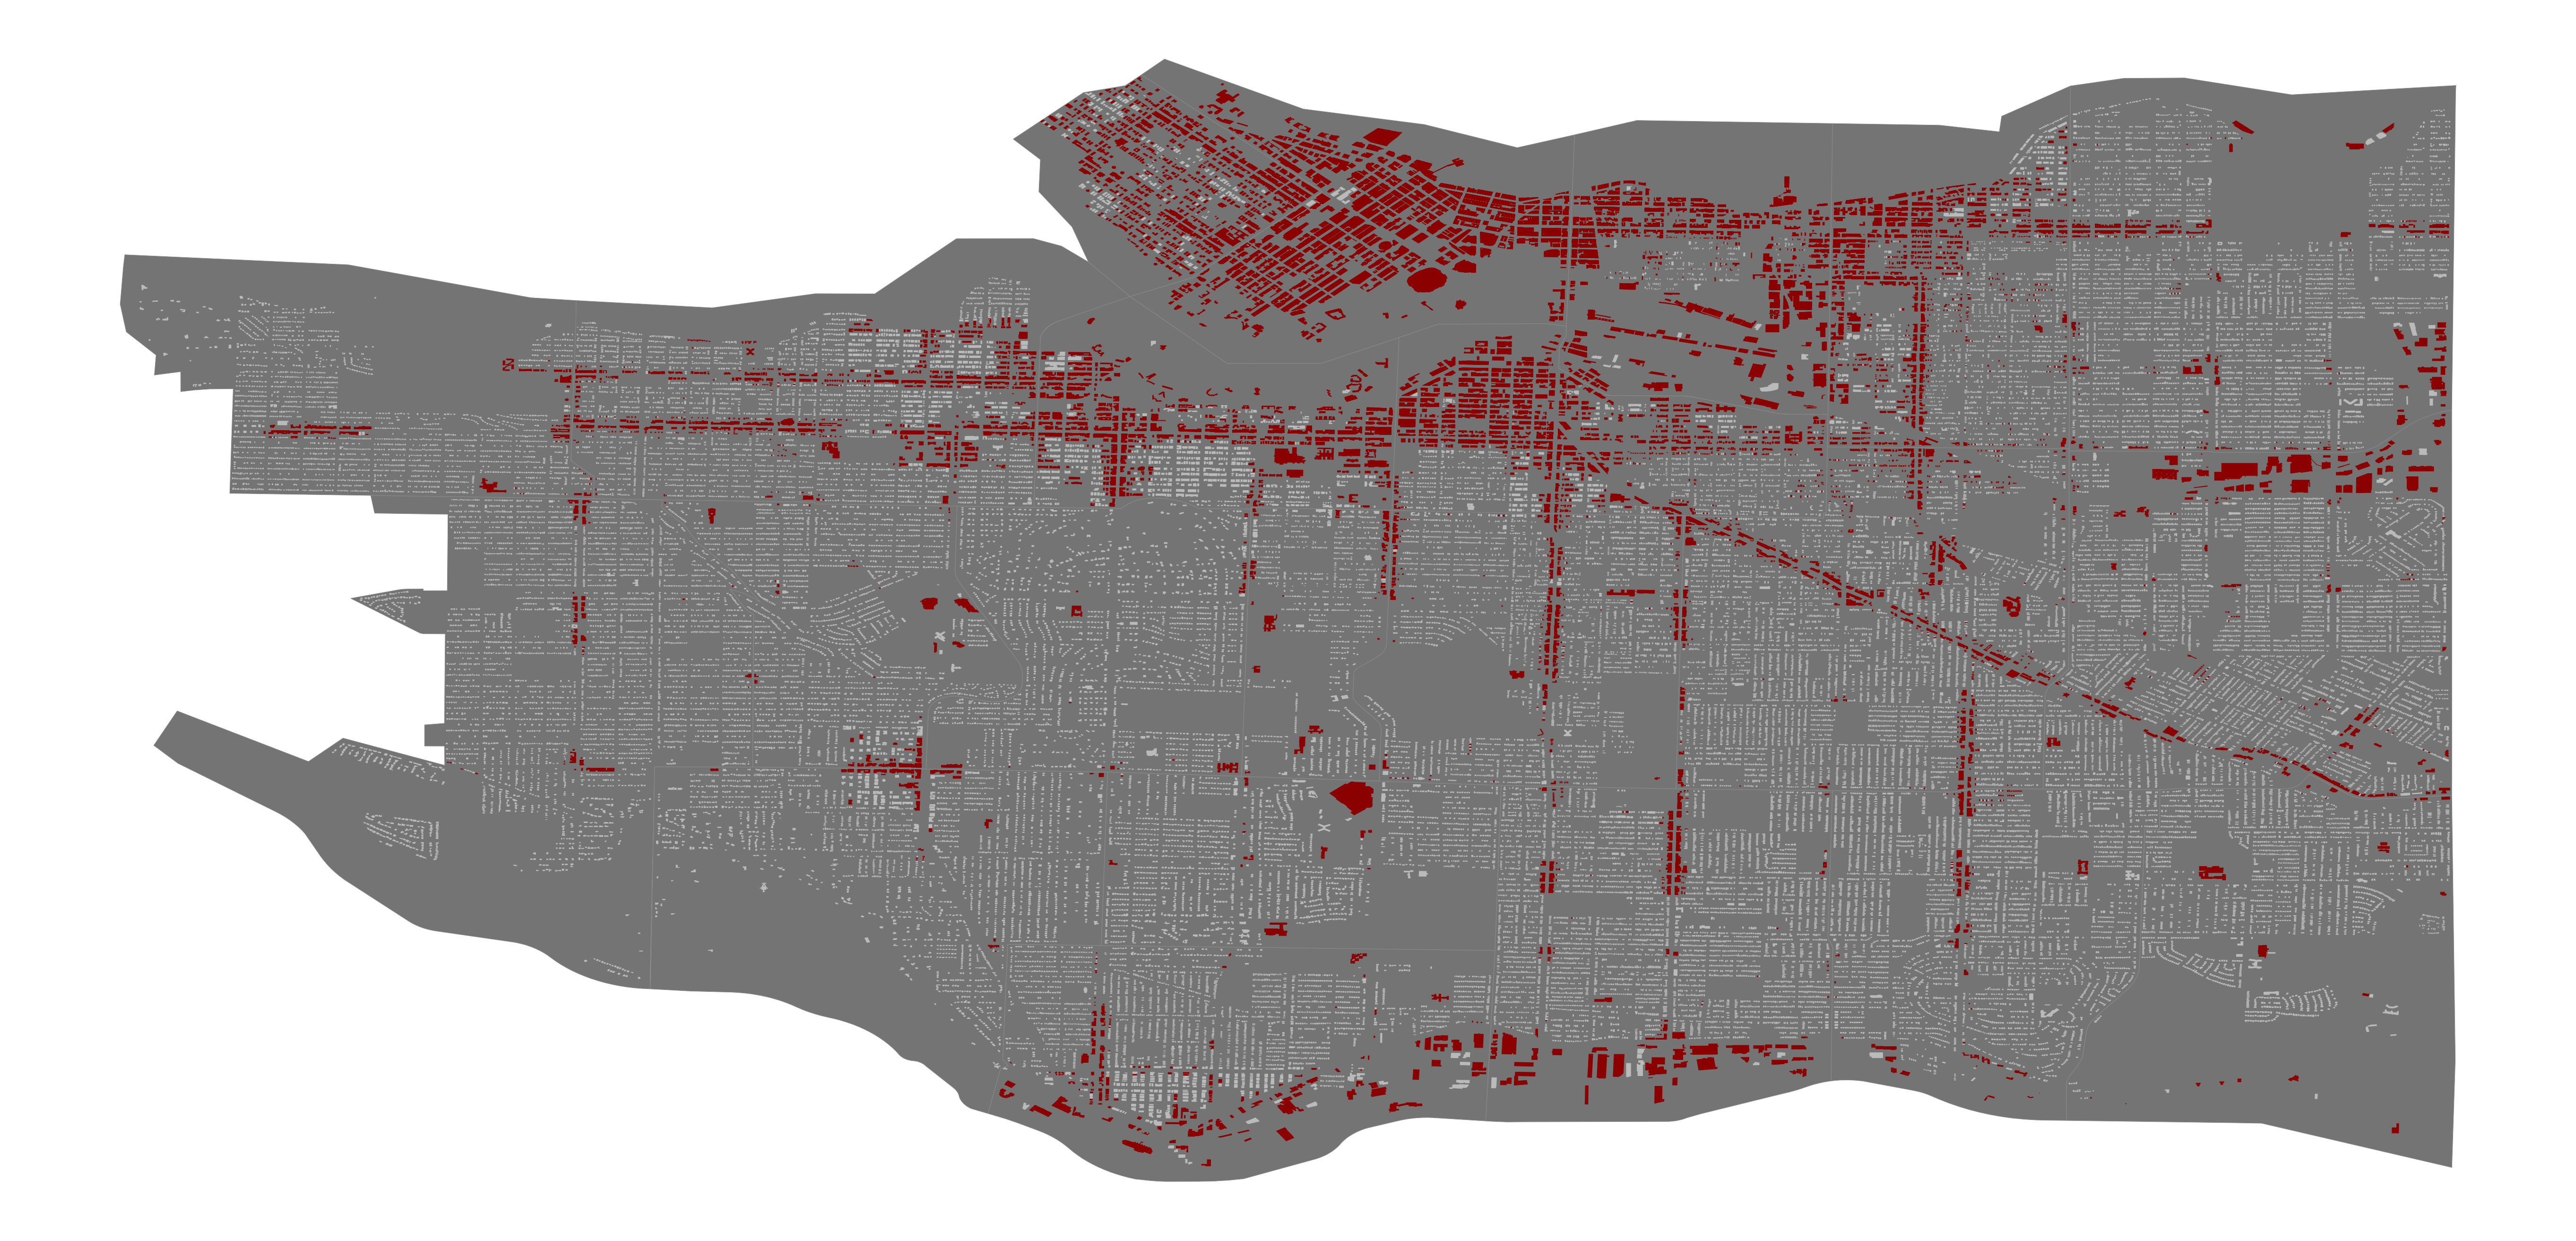

In [5]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import shape
import json
import seaborn as sns

colours = sns.color_palette("gray", 10)

vancouver_colour = colours[4]
edge_colour = colours[5]
buildings_colour = colours[7]

width_inches = 100

vancouver = gpd.read_file('../resources/data/original/local-area-boundary.csv')
vancouver['geometry'] = [shape(json.loads(x)) for x in vancouver['Geom']]
buildings \
    = gpd.read_file('../resources/data/generated/buildings_all_features.csv')
buildings['geometry'] \
    = [shape(json.loads(x)) for x in buildings['building_polygon']]

buildings['graffiti_count'] = regressor.predict(x / np.std(x, 0))

# custom colourmap
norm = matplotlib.colors.Normalize(0, buildings['graffiti_count'].max())
colors = [
    [norm(0), buildings_colour],
    [norm(0.99), buildings_colour],
    [norm(1), (246 / 255, 124 / 255, 82 / 255)],
    [norm(buildings['graffiti_count'].max()), "darkred"]
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots()
ax.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
vancouver.plot(
    ax=ax,
    edgecolor=edge_colour,
    facecolor=vancouver_colour,
    antialiased=True,
)
buildings = buildings.sort_values('graffiti_count')
buildings.plot(
    ax=ax,
    antialiased=True,
    column='graffiti_count',
    cmap=cmap,
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_difference = xlim[1] - xlim[0]
y_difference = ylim[1] - ylim[0]
fig.set_size_inches(width_inches, width_inches / x_difference * y_difference)

plt.show()